# Histograms and Image Statistics
We compute and plot the histogram of an image using a single channel. An histogram of an image represents the number of times that each pixel value occurs. We assume that the gray scale values of each pixel in the image are within the interval [0, 255]. The histogram has an entry for each allowed value, that is, no binning is applied. Let's consider an image of size MxN, whose pixels value are within an 8 bits gray scale, i.e. [0, 255], the sum of its histogram values is 

$$\sum_{i=0}^{255} h(i) = MN$$

In [1]:
import numpy as np
import skimage
from skimage import io
from skimage import util
import matplotlib.pyplot as plt

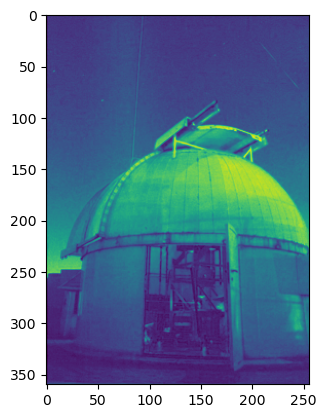

In [2]:
lidar = io.imread('images/lidar.png')[:,:,0] # use only one channel (red = 0, green = 1, blue = 2)
from skimage.color import rgb2gray
rows, cols = lidar.shape 
plt.imshow(lidar)

In [3]:
def dip_histogram(image):
    # Computes the histogram of an image
    rows, cols = image.shape
    h = np.zeros(256, dtype=int)
    for col in np.arange(0, cols, 1):
        for row in np.arange(0, rows, 1):
            v = image[row, col]
            h[v] = h[v] + 1
    return h

In [4]:
h1 = dip_histogram(lidar)

We compare the histogram with that returne from the scikit-image function

In [5]:
from skimage.exposure import histogram
h2 = histogram(lidar)
l = len(h2[0])  # last null elements are not included
(h1[0:l] == h2[0]).all() # check if the computed histogram is the same as the one from scikit-image

True

### Plot the histogram

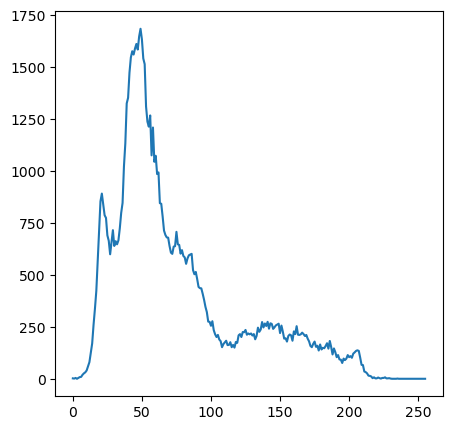

In [6]:
x =np.arange(0, 256, 1)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()
plt.plot(x,h1)

## Cumulative histogram
Given the histogram $h(j)$ of an image, with j representing a pixel value, The cumulative histogram $H(i)$ is defined as

$$H(i) = \sum_{j=0}^i h(j)$$

In [7]:
def dip_cumulativeHistogram(histogram):
    # Computes the cumulative histogram of an image
    ch = np.zeros(256, dtype=int)
    ch[0] = histogram[0]
    for i in np.arange(1, 256, 1):
            ch[i] = ch[i - 1] + histogram[i]
    return ch

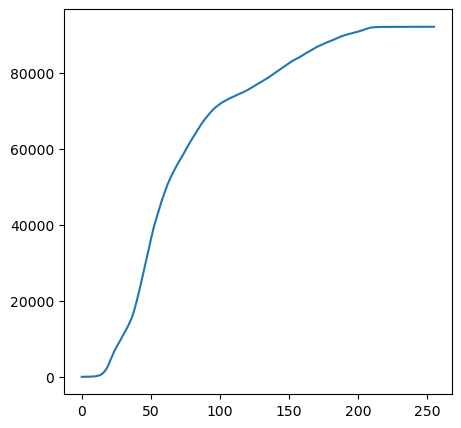

In [8]:
cumulative_hist = dip_cumulativeHistogram(h1)
x =np.arange(0, 256, 1)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()
plt.plot(x,cumulative_hist)

## Distribution function
From the histogram h(i) of an image we can compute its distribution function

$$p(i) = \frac{h(i)}{MN}$$

where i is one of the possible value of a pixel and MxN is its size. The sum of the probabilities is 

$$\sum_{i=0}^K p(i) = 1 $$

We define the distribution functions for a single channel image and for a three channels image

In [9]:
def dip_image_dist(image):
    rows, cols = image.shape
    h = dip_histogram(image)
    return h / (rows * cols)

In [10]:
def dip_rgb_image_dist(image):
    # Computes the histograms of each RGB channels of the input image 
    rows = image.shape[0]
    cols = image.shape[1]
    h_r = dip_histogram(image[:,:,0]) / (rows * cols)
    h_g = dip_histogram(image[:,:,1]) / (rows * cols)
    h_b = dip_histogram(image[:,:,2]) / (rows * cols)
    h = np.array((h_r, h_g, h_b))
    return h

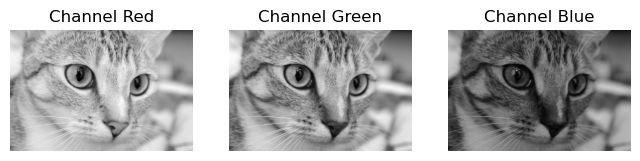

In [11]:
source_img = skimage.data.chelsea()
channels = ["Red", "Green", "Blue"]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 3))
for i in range(0, 3):
    axes[i].set_title('Channel %s'%channels[i])
    axes[i].set_axis_off()
    axes[i].imshow(source_img[:,:,i], cmap='gray')

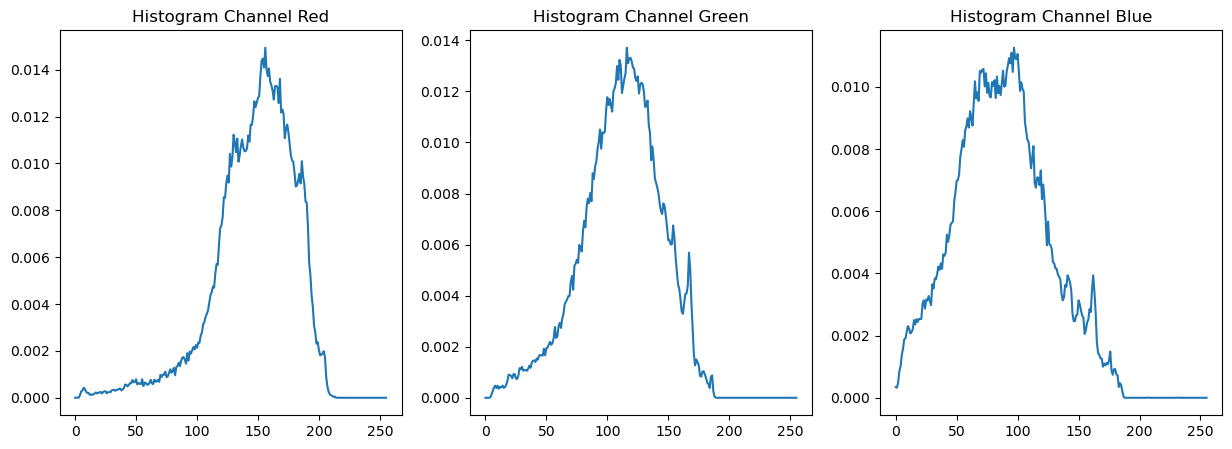

In [12]:
source_hist = dip_rgb_image_dist(source_img)
x =np.arange(0, 256, 1)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
for i in range(0, 3):
    axes[i].set_title('Histogram Channel %s'%channels[i])
    axes[i].plot(x, source_hist[i])

## Cumulative distribution function
From the cumulative histogram H(i) of an image we can compute its cumulative distribution function. If K is the maximum value of that a pixel can possibly have, e.g. K = 255 for an 8-bit image, then

$$P(i) = \frac{H(i)}{H(255)}$$

We define the cumulative distribution functions for a single channel image and for a three channels image

In [13]:
def dip_image_cumulative_dist(image):
    # Computes the cumulative histogram of a single channel image
    rows, cols = image.shape
    histogram = dip_histogram(image)
    cumulative_hist = dip_cumulativeHistogram(histogram)
    return cumulative_hist / (rows * cols)

In [14]:
def dip_rgb_image_cumulative_dist(image):
    # Computes the cumulative histograms of each RGB channel of the input image 
    rows = image.shape[0]
    cols = image.shape[1]
    h_r = dip_histogram(image[:,:,0]) 
    h_g = dip_histogram(image[:,:,1]) 
    h_b = dip_histogram(image[:,:,2])
    ch_r = dip_cumulativeHistogram(h_r) / (rows * cols)
    ch_g = dip_cumulativeHistogram(h_g) / (rows * cols)
    ch_b = dip_cumulativeHistogram(h_b) / (rows * cols)
    ch = np.array((ch_r, ch_g, ch_b))
    return ch

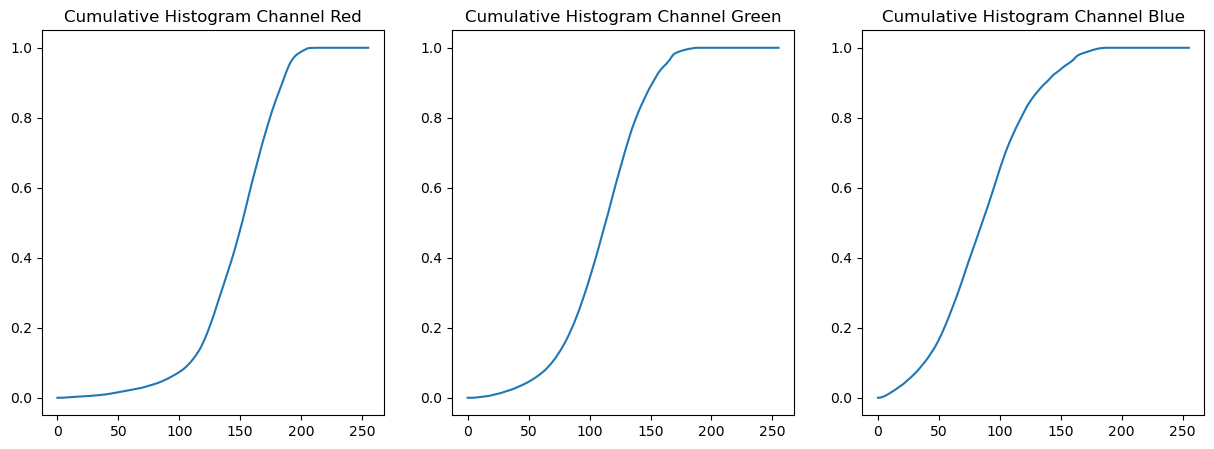

In [15]:
source_chist = dip_rgb_image_cumulative_dist(source_img)
x =np.arange(0, 256, 1)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
for i in range(0, 3):
    axes[i].set_title('Cumulative Histogram Channel %s'%channels[i])
    axes[i].plot(x, source_chist[i])

## Mean and Variance

The mean value $\mu$ of an image whose size is MxN is defined as

$$\mu = \frac{1}{MN} \sum_{u=0}^{M - 1} \sum_{v=0}^{N - 1} I(u, v)$$

that is easily translated into an algorithm

In [16]:
def dip_mean(image):
    # Computes the mean of the pixels' values
    rows, cols = image.shape
    sum = 0.0
    for col in np.arange(0, cols, 1):
        for row in np.arange(0, rows, 1):
            sum = sum + image[row, col]
    return sum / (rows * cols)

We don't really need to implement the algorithm to compute the mean of an image since being an numpy array object it comes with its own mean() function. We can compare that the two mean values are the same 

In [17]:
dip_mean(lidar) == lidar.mean()

True

The variance $\sigma^2$ of an image of size MxN is defined as

$$\sigma^2 = \frac{1}{MN} \sum_{u=0}^{M - 1} \sum_{v=0}^{N - 1} (I(u, v) - \mu)^2$$

In [18]:
def dip_variance(image):
    # Computes the mean of the pixels' values
    rows, cols = image.shape
    mean = dip_mean(image)
    var = 0.0
    for col in np.arange(0, cols, 1):
        for row in np.arange(0, rows, 1):
            var = var + (image[row, col] - mean) * (image[row, col] - mean)
    return var / (rows * cols)

A numpy object has also a method to compute the variance and we can see that the result is the same up to the 9th decimal digit 

In [19]:
dip_variance(lidar) - lidar.var()

3.356035449542105e-10

In [20]:
plt.close('all')